<a href="https://colab.research.google.com/github/horasan/ml/blob/main/2_R_LER_Linear_Regression_E_commerce_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website/data

link: https://www.youtube.com/watch?v=O2Cw82YR5Bo&t=25s

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from google.colab import drive
%matplotlib inline
pd.set_option('display.max_columns', None) # all the columns will be shown
pd.set_option('display.max_rows', 99) # 99 of the possible rows will be shown

import scipy.stats as stats
import math

In [3]:
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/0_R_LER/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# To Do List
0) Explore the dataset

1) Cleaning

2) Feature engineering

3) Feature transformation

4) Encoding

5) Scaling

6) Model selection

7) Hyperparameter optimization

8) Ensembling

9) Feature selection

In [4]:
# 2_R_LER_Linear_Regression_E_commerce_Dataset_customers
df = pd.read_csv(DRIVE_DATASET_PATH + "2_R_LER_Linear_Regression_E_commerce_Dataset_customers.csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
# notes
# 1) Email, Address, Avatar data might be deleted.


In [6]:
# Check for values and the frequencies
df["Avatar"].value_counts()
# TODO: so some of the customers appairs more than once.

,count
Avatar,
SlateBlue,7
Cyan,7
CadetBlue,7
GreenYellow,7
Teal,7
...,...
MediumPurple,1
CornflowerBlue,1
LightGoldenRodYellow,1


In [7]:
df.query("Avatar == 'SlateBlue'")

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
116,josesims@hunter.com,"8830 Debra Loaf Apt. 341\nDrakeville, ME 22340",SlateBlue,33.925795,12.011022,36.701052,2.753424,479.231093
124,richard81@day.org,"7955 Samantha Walk Suite 230\nNorth Luis, IL 4...",SlateBlue,33.014792,11.761172,37.570164,3.834170,514.336558
141,solischristina@gmail.com,"43102 Russo View Suite 717\nHollyport, SC 15344",SlateBlue,31.851253,12.418962,35.977652,3.251742,472.992247
222,sanchezkara@hotmail.com,"40494 Robert Park\nHeatherside, IL 70364",SlateBlue,34.334865,11.109456,38.585855,3.892891,502.409785
241,karenosborne@yahoo.com,"81814 Pratt Squares Suite 460\nNorth Robert, G...",SlateBlue,32.686245,12.638572,36.097221,4.297737,571.471034
324,laurajimenez@gmail.com,"06103 Erik Fields Suite 781\nJonesmouth, GA 49...",SlateBlue,33.479472,12.608889,37.229395,4.205904,559.199048
367,carolfarley@gmail.com,"51173 Curtis Cliff Apt. 727\nRamoston, DE 3271...",SlateBlue,32.990599,10.441235,35.938963,2.895075,407.657179


# 1) Target value observations

array([[<Axes: title={'center': 'Yearly Amount Spent'}>]], dtype=object)

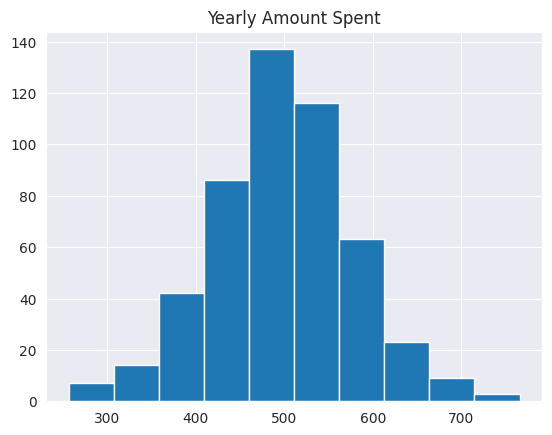

In [8]:
df.hist(column= "Yearly Amount Spent")

Yearly Amount Spent.mean:499.31403825859053
Yearly Amount Spent.std: 79.31478154970677
Yearly Amount Spent.min: 256.67058229005585
Yearly Amount Spent.max: 765.5184619388372



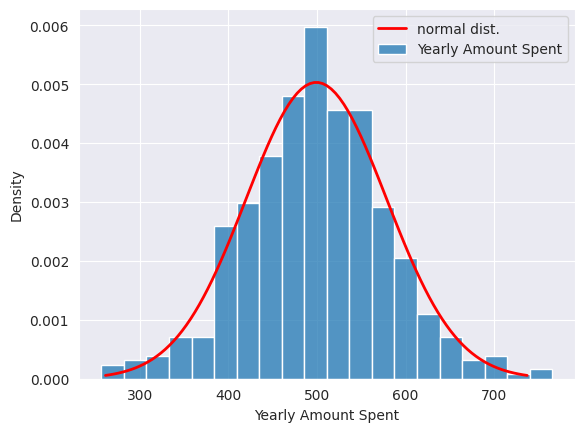

In [9]:
type(df["Yearly Amount Spent"])

#df["Yearly Amount Spent"].mean()

mean = df["Yearly Amount Spent"].mean()
std = df["Yearly Amount Spent"].std()
min = df["Yearly Amount Spent"].min()
max= df["Yearly Amount Spent"].max()


print(
    "Yearly Amount Spent.mean:" + str(mean) + "\n"
    "Yearly Amount Spent.std: " + str(std) + "\n"
    "Yearly Amount Spent.min: " + str(min) + "\n"
    "Yearly Amount Spent.max: " + str(max) + "\n"
    )

#x_values = np.linspace(mean - 3*std, mean + 3*std, 100)
#plt.plot(x_values, stats.norm.pdf(x_values, mean, std))
#plt.show()

ax = sns.histplot(df["Yearly Amount Spent"], kde=False, stat='density', label='Yearly Amount Spent')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(mean - 3*std, mean + 3*std, 100)
y_pdf = stats.norm.pdf(x_pdf, mean, std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal dist.')
ax.legend()

# so Yearly Amount Spent is normally distributed. No need to work on this feature

# 2) Recurring data!

In [10]:
#df.groupby(["Email", "Avatar"]).size()


df_email_avatar = pd.DataFrame(df.groupby(["Email", "Avatar"]).size(), columns=["number_of"])
print("Number of Email&Avatar: " + str(len(df_email_avatar.query("number_of > 1"))))


print("Emails are unique: " + str(pd.DataFrame(df["Email"].value_counts()).query("count > 1")))

Number of Email&Avatar: 0
Emails are unique: Empty DataFrame
Columns: [count]
Index: []


# x) Dropping features

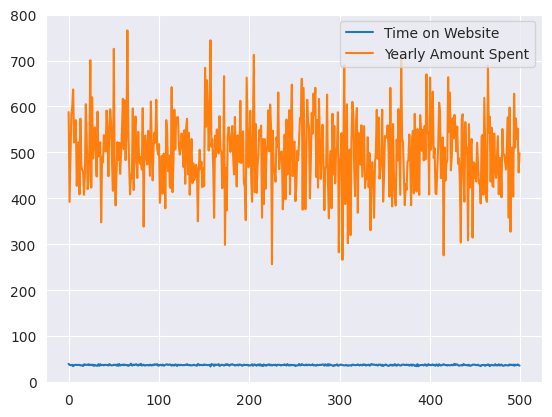

In [11]:
# correlation between Time on Website vs Yearly Amount Spent

df_tow_vs_yas = df[["Time on Website", "Yearly Amount Spent"]]
df_tow_vs_yas

df_tow_vs_yas.plot()

# uncorrelated colum with the target
df = df.drop(["Time on Website"], axis = 1)
# unrelated text values
df = df.drop(["Email", "Address", "Avatar"], axis = 1)

# x) Correlations about the data

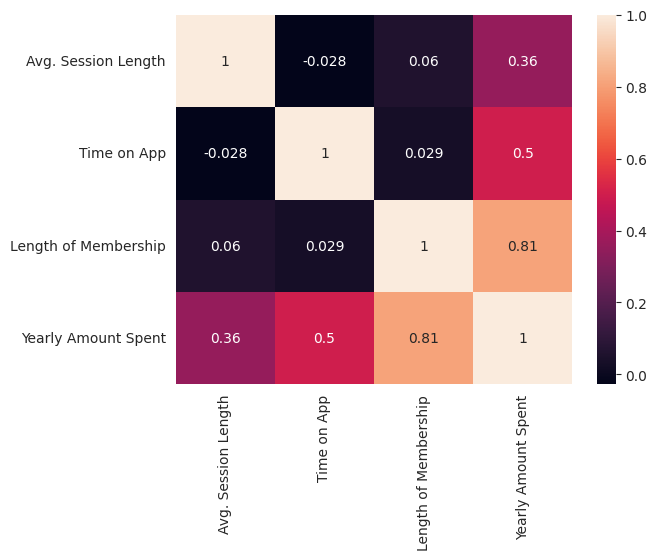

In [12]:
sns.heatmap(df.corr(), annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

# Seems to be no correlation between Time on Website vs Yearly Amount Spent

# x) Data split

In [13]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Length of Membership  500 non-null    float64
 3   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [14]:
X = df.drop(["Yearly Amount Spent"], axis=1)
y = df["Yearly Amount Spent"]

# x) Data normalization

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X.columns

scaler.fit(X)



StandardScaler()

In [17]:
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,400.0,-0.018314,1.016667,-3.550697,-0.717419,0.023723,0.654264,3.112709
Time on App,400.0,0.008338,0.971448,-3.568527,-0.648206,-0.069729,0.689363,3.095491
Length of Membership,400.0,-0.012974,1.036462,-3.269191,-0.624757,0.001987,0.598966,3.395075


# x) Model selection

In [20]:
from pycaret.regression import setup, compare_models

In [23]:
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [29]:
setup(pd.concat([X_train, y_train], axis=1), target="Yearly Amount Spent")

,Description,Value
0,Session id,434
1,Target,Yearly Amount Spent
2,Target type,Regression
3,Original data shape,"(400, 4)"
4,Transformed data shape,"(400, 4)"
5,Transformed train set shape,"(280, 4)"
6,Transformed test set shape,"(120, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [30]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,7.8160,98.5068,9.7884,0.9841,0.0201,0.0160,0.0520
lr,Linear Regression,7.8283,98.6312,9.7897,0.9840,0.0201,0.0161,0.6200
ridge,Ridge Regression,7.8129,98.7162,9.7912,0.9840,0.0201,0.0160,0.0270
lar,Least Angle Regression,7.8283,98.6313,9.7897,0.9840,0.0201,0.0161,0.0300
br,Bayesian Ridge,7.8274,98.6310,9.7896,0.9840,0.0201,0.0161,0.0400
lasso,Lasso Regression,7.8623,101.4891,9.9221,0.9838,0.0206,0.0163,0.0220
llar,Lasso Least Angle Regression,7.8623,101.4892,9.9221,0.9838,0.0206,0.0163,0.0390
par,Passive Aggressive Regressor,8.5776,115.8520,10.6383,0.9815,0.0217,0.0176,0.0390
et,Extra Trees Regressor,13.4231,309.8214,17.5047,0.9516,0.0379,0.0283,0.1460
gbr,Gradient Boosting Regressor,13.9179,321.2621,17.7709,0.9504,0.0395,0.0298,0.0910


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


HuberRegressor()

In [ ]:
# top 3: huber	Huber Regressor, lr	Linear Regression(x), ridge	Ridge Regression(x)

In [32]:
from sklearn.linear_model import Ridge, LinearRegression, HuberRegressor
from sklearn.model_selection import KFold, cross_val_score

In [33]:
kf =  KFold(n_splits=10)

-0.0004616090235064961

In [41]:
models = {
    "huber": HuberRegressor(),
    "lr": LinearRegression(),
    "ridge": Ridge()
}

for short, model in models.items():
    model.fit(X_train, y_train)
    result_set = cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_log_error", cv=kf)
    print("Model name short: " + short + ": " + str(result_set.mean()))



Model name short: huber: -0.0004616090235064961
Model name short: lr: -0.0004561270468159518
Model name short: ridge: -0.00045565969036346087


#x) Predictions

In [43]:
model_huber = HuberRegressor()
model_huber.fit(X_train, y_train)


HuberRegressor()

In [44]:
predictions = model_huber.predict(X_test)
predictions

array([558.81522712, 394.99803877, 487.58824036, 506.64146177,
       450.38358576, 458.47396489, 425.13450392, 501.9995275 ,
       510.25738218, 667.79159422, 472.44143651, 535.4514742 ,
       448.96091147, 601.99296944, 495.35530708, 440.77427546,
       725.41719258, 500.34734416, 481.41615537, 539.42364537,
       385.97967575, 520.04143548, 525.90903609, 432.06010962,
       379.92494661, 457.45277059, 424.37495468, 432.94328666,
       434.09868986, 532.45675048, 509.21100433, 465.18768523,
       416.71008314, 401.72517369, 546.07611273, 551.0567265 ,
       478.37431332, 581.68429186, 372.95524363, 616.68221552,
       484.53599403, 416.76309085, 550.73471478, 511.99009593,
       573.82969064, 529.65751895, 476.05619314, 376.21866013,
       451.36726677, 518.2289045 , 339.4495538 , 461.66331423,
       456.69291024, 477.03113435, 552.01435103, 498.35311828,
       452.12670208, 648.98991058, 498.70276364, 468.60993938,
       506.5337125 , 409.11247098, 623.51269538, 558.35

In [47]:
df_predictions = pd.DataFrame(predictions, columns=["pred"])
df_predictions

,pred
0,558.815227
1,394.998039
2,487.588240
3,506.641462
4,450.383586
...,...
95,573.763658
96,348.152426
97,590.515457
98,518.621308


In [54]:
y_test = y_test.reset_index(drop=True)

In [55]:
y_test

df_all_results = pd.concat([y_test, df_predictions], axis=1)
df_all_results

,Yearly Amount Spent,pred
0,544.409272,558.815227
1,388.940549,394.998039
2,487.646232,487.588240
3,521.195311,506.641462
4,439.891280,450.383586
...,...,...
95,571.216005,573.763658
96,357.857984,348.152426
97,590.562720,590.515457
98,529.230090,518.621308


<Axes: xlabel='Yearly Amount Spent', ylabel='pred'>

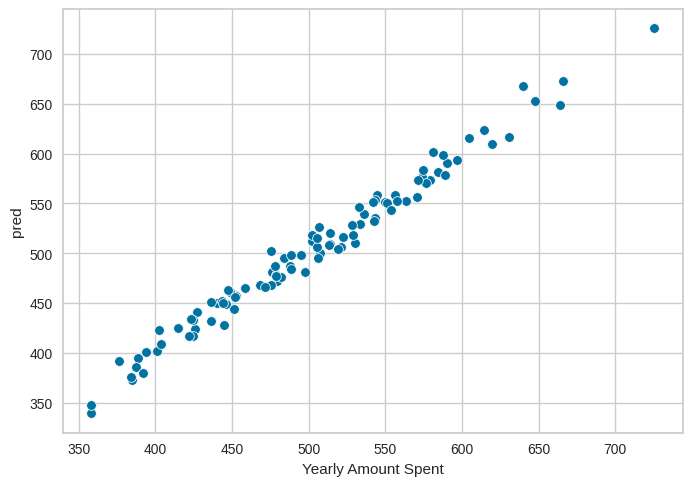

In [56]:
sns.scatterplot(data=df_all_results, x="Yearly Amount Spent", y="pred")

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [60]:
print("Mean absolute error: ", mean_absolute_error(y_test, df_predictions))
print("Mean squared error: ", mean_squared_error(y_test, df_predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, df_predictions)))

Mean absolute error:  8.559532798892471
Mean squared error:  107.00708105157537
RMSE:  10.344422702672942


In [61]:
# qq plot
from scipy.stats import stats
residuals = y_test-df_predictions
# todo qq plot. why is this qq plot is useful?

AttributeError: scipy.stats.stats is deprecated and has no attribute probplot. Try looking in scipy.stats instead.